# Python 與機器學習（8）

## 郭耀仁

## Kaggle 機器學習競賽

- [Kaggle](https://www.kaggle.com/)
- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

## Kaggle 機器學習競賽（2）

- 我們要練習的是預測 **test.csv** 資料集中的 **survival** 變數
- 用來訓練與測試的資料即是 **train.csv** 資料集
- 資料集的變數：

|變數|描述|
|---|----|
|survival|存活與否，	0 = 歿、1 = 存|
|pclass|社經地位，1 = 高、2 = 中、3 = 低|
|sex|性別|
|Age|年齡|
|sibsp|船上旁系親屬的人數|
|parch|船上直系親屬的人數|
|ticket|船票編號|
|fare|船票價格|
|cabin|船艙編號|
|embarked|登船港口，C = Cherbourg、Q = Queenstown、S = Southampton|

## Kaggle 機器學習競賽（3）

- 流程：

|步驟|內容|
|---|----|
|第一步|暸解資料外觀與內容|
|第二步|資料預處理|
|第三步|分類器|
|第四步|預測、模型評估|
|第五步|應用預測資料|
|第六步|上傳|

# 第一次上傳

## 暸解資料外觀與內容

In [1]:
import pandas as pd

train_url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(train_url)
train.head(3) # 前 3 個觀測值

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print(train.shape)
print(train.dtypes)
print(train.isnull().sum())

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
print(train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False))
print("\n")
print(train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False))

0    0.811092
1    0.188908
Name: Survived, dtype: float64


0    0.257962
1    0.742038
Name: Survived, dtype: float64


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def bar_plotting(lst_1, lst_2, group_1, group_2):
    N = len(lst_1)
    ind = np.arange(N)
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, lst_1, width, color='r')
    rects2 = ax.bar(ind + width, lst_2, width, color='g')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels((0, 1))
    ax.set_xlabel("Survived")
    ax.set_ylabel('Survived Percentage')
    ax.legend((rects1[0], rects2[0]), (group_1, group_2))

male_survived = list(train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False))
female_survived = list(train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False))
bar_plotting(male_survived, female_survived, 'Men', 'Women')
plt.title('Survived Percentage by Gender')

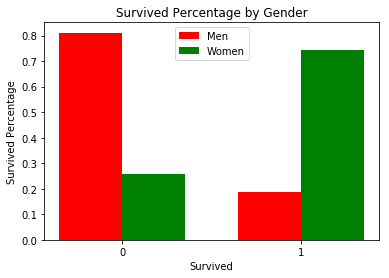

In [5]:
plt.show()

In [6]:
child = pd.Series(np.empty(train.shape[0]))
train.Child = child
age_filter_under_18 = train.Age < 18
age_filter_above_18 = train.Age >= 18
train.Child[age_filter_under_18] = 1
train.Child[age_filter_above_18] = 0
print(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
print(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))

0    0.460177
1    0.539823
Name: Survived, dtype: float64
0    0.636616
1    0.363384
Name: Survived, dtype: float64


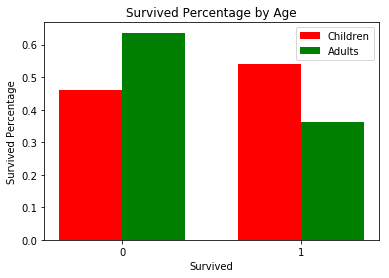

In [7]:
child_survived = list(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
adult_survived = list(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))

bar_plotting(child_survived, adult_survived, 'Children', 'Adults')
plt.title('Survived Percentage by Age')
plt.show()

## 暸解資料外觀與內容（2）

- 如果我們模擬機器學習：
    - 看到乘客是男性且是成人：預測死亡
    - 看到乘客是女性且是小孩：預測存活

## 資料預處理

- $X$ 不要納入編號（PassengerId, Ticket）、姓名（Name）與遺漏值過多的變數（Cabin）
- 填補遺漏值
    - Embarked
    - Age

In [8]:
# Embarked 的遺漏值都以 "S" 填補
train_url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(train_url)
print(train.Embarked.value_counts())
most_embarked = train.Embarked.value_counts().index[0]
train.Embarked = train.Embarked.fillna(most_embarked)
print(sum(train.Embarked.isnull()))

S    644
C    168
Q     77
Name: Embarked, dtype: int64
0


In [9]:
# Age 的遺漏值以中位數填補
age_median = train.Age.median()
train.Age = train.Age.fillna(age_median)
print(sum(train.Age.isnull()))

0


## 資料預處理（2）

- 類別標籤編碼轉換（使用 One-hot encoding）
    - Sex
    - Embarked

In [10]:
# 使用 one-hot encoding 進行類別標籤編碼轉換
train_sex_embarked_dummies = pd.get_dummies(train.loc[:, ["Sex", "Embarked"]])
train_sex_embarked_ohe = train_sex_embarked_dummies.values.astype(float)
train_sex_embarked_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


## 分類器

- 決策樹分類器

In [11]:
from sklearn import tree

# 整理 features 跟 target
train_features = np.hstack((train.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, train_sex_embarked_ohe))
target = train.Survived.values

# 建立模型
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87)
tree_clf.fit(train_features, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=87, splitter='best')

## 預測、模型評估

In [12]:
print(tree_clf.feature_importances_)
print(tree_clf.score(train_features, target))

[ 0.08141882  0.29239577  0.02738117  0.01737284  0.30813586  0.23919358
  0.          0.02053509  0.00339779  0.01016907]
0.979797979798


## 應用預測資料

In [13]:
test_url = "https://storage.googleapis.com/py_ml_datasets/test.csv"
test = pd.read_csv(test_url)
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [14]:
print(test.shape)
print(test.dtypes)
print(test.isnull().sum())

(418, 11)
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [15]:
# Age 的遺漏值以中位數填補
age_median = test.Age.median()
test.Age = test.Age.fillna(age_median)
print(sum(test.Age.isnull()))

# Fare 的遺漏值以平均數填補
fare_median = test.Fare.median()
test.Fare = test.Fare.fillna(fare_median)
print(sum(test.Fare.isnull()))

0
0


In [16]:
# 使用 one-hot encoding 進行類別標籤編碼轉換
test_sex_embarked_dummies = pd.get_dummies(test.loc[:, ["Sex", "Embarked"]])
test_sex_embarked_ohe = test_sex_embarked_dummies.values.astype(float)
test_sex_embarked_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1


In [17]:
# 整理 test_features
test_features = np.hstack((test.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, test_sex_embarked_ohe))

# 預估
predictions = tree_clf.predict(test_features)
print(predictions)

[0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


## 上傳

- 參考 [Submission File Format](https://www.kaggle.com/c/titanic#evaluation) 整理一下上傳檔案

In [18]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
print(my_solution.head())
print(my_solution.shape)
my_solution.to_csv("my_first_solution.csv", index_label = ["PassengerId"])

     Survived
892         0
893         0
894         0
895         1
896         1
(418, 1)


# 第二次上傳

## 分類器

- 設定決策樹的參數：
    - max_depth
    - min_samples_split

In [19]:
from sklearn import tree

# 建立模型
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87, max_depth = 10, min_samples_split = 5)
tree_clf.fit(train_features, target)
print(tree_clf.score(train_features, target))

0.904601571268


## 應用預測資料

In [20]:
# 預估
predictions = tree_clf.predict(test_features)
print(predictions)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


## 上傳

In [21]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_second_solution.csv", index_label = ["PassengerId"])

# 第三次上傳

## 資料預處理

- 將 `SibSp` 與 `Parch` 相加再加 1（自己）成為 `family_size`

In [22]:
train_copied = train.copy()
train_copied['family_size'] = train_copied['SibSp'] + train_copied['Parch'] + 1
train_copied.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


## 分類器

In [23]:
from sklearn import tree

# 整理 features 跟 target
train_features = np.hstack((train_copied.loc[:, ["Pclass", "Age", "family_size", "Fare"]].values, train_sex_embarked_ohe))
target = train.Survived.values

# 建立模型
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87, max_depth = 10, min_samples_split = 5)
tree_clf.fit(train_features, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=87, splitter='best')

## 應用預測資料

In [24]:
# 整理 test_features
test_copied = test.copy()
test_copied['family_size'] = test_copied['SibSp'] + test_copied['Parch'] + 1
test_features = np.hstack((test_copied.loc[:, ["Pclass", "Age", "family_size", "Fare"]].values, test_sex_embarked_ohe))

# 預估
predictions = tree_clf.predict(test_features)
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


## 上傳

In [25]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_third_solution.csv", index_label = ["PassengerId"])

# 第四次上傳

## 分類器

- 改使用隨機森林分類器

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
forest_clf = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 87)
forest_clf.fit(train_features, target)
print(forest_clf.score(train_features, target))

0.939393939394


## 應用預測資料

In [27]:
# 預估
predictions = forest_clf.predict(test_features)
print(predictions)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


## 上傳

In [28]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_fourth_solution.csv", index_label = ["PassengerId"])